## 5CS037 Assignment 01 — Statistical Interpretation and Exploratory Data Analysis
**Name:** Bhawanath Sapkota

**Group:** L2G4  
**Dataset:** Human_Development_Index_Dataset.csv  
wow



##**Assignment - I - Statistical Interpretation and Exploratory Data Analysis.**

# Problem 1
Basic Data Exploration & Trend Visualization


#Problem - 1A - Single Year HDI Exploration (Latest Year: 2022)

In [689]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [690]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [691]:
# Load dataset (place Human_Development_Index_Dataset.csv in the SAME folder as this notebook)

file_path = "/Human_Development_Index_Dataset.csv" # Updated path to Google Drive

df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Drop unwanted index column if present
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

# Identify unique years
unique_years = sorted(df["year"].unique())

print("Unique years in the dataset:")
print(unique_years)
print("\nLatest year available:", max(unique_years))

Unique years in the dataset:
[np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022)]

Latest year available: 2022


### Missing Values, Cleaning, HDI Category

Missing values are handled because HDI is the core metric. Rows without HDI cannot be used for ranking or categorisation. Special symbols such as '–' are treated as missing values and duplicates are removed.

In [692]:
# Filter data for the latest year (2022)
hdi_2022_df = df[df["year"] == 2022].copy()

# Display basic info
print("Shape of 2022 dataset:", hdi_2022_df.shape)
print("Number of countries in 2022:", hdi_2022_df["country"].nunique())

hdi_2022_df.head()


Shape of 2022 dataset: (206, 29)
Number of countries in 2022: 206


,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,74.502,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,75.853,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,81.430,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,59.351,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568


In [693]:
# Save filtered dataframe for reuse
hdi_2022_df.to_csv("hdi_2022_df.csv", index=False)

In [694]:
# Display first 10 rows
hdi_2022_df.head(10)


,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,74.502,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,75.853,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,81.430,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,59.351,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568
197,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,76.507,...,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
230,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,72.851,...,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
263,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,67.866,...,1.026,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553
296,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,81.708,...,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
329,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,80.150,...,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621


In [695]:
# Number of rows and columns
rows, cols = hdi_2022_df.shape
print("Number of rows:", rows)
print("Number of columns:", cols)

Number of rows: 206
Number of columns: 29


In [696]:
hdi_2022_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 32 to 6797
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   iso3                       206 non-null    object 
 1   country                    206 non-null    object 
 2   year                       206 non-null    int64  
 3   hdi                        204 non-null    float64
 4   life_expectancy            206 non-null    float64
 5   pop_millions               206 non-null    float64
 6   hdi_f                      193 non-null    float64
 7   hdi_m                      193 non-null    float64
 8   life_expec_f               206 non-null    float64
 9   life_expec_m               206 non-null    float64
 10  expec_yr_school            205 non-null    float64
 11  expec_yr_school_f          205 non-null    float64
 12  expec_yr_school_m          205 non-null    float64
 13  mean_yr_school             204 non-null    float64
 1

In [697]:
# Column names and data types
hdi_2022_df.dtypes

,0
iso3,object
country,object
year,int64
hdi,float64
life_expectancy,float64
pop_millions,float64
hdi_f,float64
hdi_m,float64
life_expec_f,float64
life_expec_m,float64


In [698]:
# Check missing values per column
missing_counts = hdi_2022_df.isna().sum()

missing_counts[missing_counts > 0]

,0
hdi,2
hdi_f,13
hdi_m,13
expec_yr_school,1
expec_yr_school_f,1
expec_yr_school_m,1
mean_yr_school,2
mean_yr_school_f,2
mean_yr_school_m,2
gross_inc_percap,2


In [699]:
# Check data types
hdi_2022_df.dtypes

,0
iso3,object
country,object
year,int64
hdi,float64
life_expectancy,float64
pop_millions,float64
hdi_f,float64
hdi_m,float64
life_expec_f,float64
life_expec_m,float64


In [700]:
# Identify object columns (potential numeric stored as text)
object_cols = hdi_2022_df.select_dtypes(include="object").columns
object_cols

Index(['iso3', 'country'], dtype='object')

In [701]:
# Check number of rows vs unique country names
total_rows = hdi_2022_df.shape[0]
unique_countries = hdi_2022_df["country"].nunique()

print("Total rows:", total_rows)
print("Unique country names:", unique_countries)


Total rows: 206
Unique country names: 206


In [702]:
# non_countires

non_countries = [
   "World",
    "Arab States",
    "East Asia and the Pacific",
    "Europe and Central Asia",
    "Latin America and the Caribbean",
    "South Asia",
    "Sub-Saharan Africa",
    "Very high human development",
    "High human development",
    "Medium human development",
    "Low human development"
]

hdi_2022_df = hdi_2022_df[~hdi_2022_df["country"].isin(non_countries)].copy()

In [703]:
fix_names = {
    "Republic of Korea": "South Korea",
    "Viet Nam": "Vietnam",
    "Russian Federation": "Russia",
    "Syrian Arab Republic": "Syria",
    "Lao People's Democratic Republic": "Laos",
    "Micronesia (Federated States of)": "Micronesia",
    "Bolivia (Plurinational State of)": "Bolivia",
    "Iran (Islamic Republic of)": "Iran",
    "Venezuela (Bolivarian Republic of)": "Venezuela",
    "Tanzania (United Republic of)": "Tanzania",
    "Republic of Moldova": "Moldova",
    "Moldova (Republic of)": "Moldova",
    "Congo (Democratic Republic of the)": "Democratic Republic of the Congo",
    "Eswatini (Kingdom of)": "Eswatini",
    "Korea (Republic of)": "South Korea"

}

hdi_2022_df.loc[:, "country"] = hdi_2022_df["country"].replace(fix_names)

In [704]:
# Display country names (optional manual inspection)
sorted(hdi_2022_df["country"].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "Côte d'Ivoire",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Hondu

In [705]:
# Check uniqueness of country names
hdi_2022_df["country"].nunique(), hdi_2022_df.shape[0]


(195, 195)

In [706]:
# Check duplicate rows
duplicate_rows = hdi_2022_df.duplicated().sum()
duplicate_rows


np.int64(0)

In [707]:
# remove special characters with NaN:

import numpy as np

df_2022 = hdi_2022_df.replace(["..", "-", "NA", "N/A", "n/a", ""], np.nan)

In [708]:

hdi_2022_df.isnull().sum().sort_values(ascending=False)

,0
mat_footprint_percap_tons,41
gender_inequality,29
secondary_education_f_%,17
secondary_education_m_%,17
hdi_f,13
hdi_m,13
gross_inc_percap_m,13
gender_development,13
gross_inc_percap_f,13
labour_participation_f_%,12


In [709]:
# Ensure numeric columns are properly typed
numeric_cols = hdi_2022_df.columns.drop(["country", "iso3"])

hdi_2022_df[numeric_cols] = hdi_2022_df[numeric_cols].apply(
    pd.to_numeric, errors="coerce"
)


In [710]:
# Remove duplicate rows if any
hdi_2022_df = hdi_2022_df.drop_duplicates()


In [711]:
# Drop rows with missing HDI values only
hdi_2022_df = hdi_2022_df.dropna(subset=["hdi"])


In [712]:
# Impute other numeric columns using median

num_cols = hdi_2022_df.select_dtypes(include=["float64", "int64"]).columns
num_cols = num_cols.drop("hdi")

hdi_2022_df[num_cols] = hdi_2022_df[num_cols].fillna(hdi_2022_df[num_cols].median())


In [713]:
hdi_2022_df.isnull().sum()

,0
iso3,0
country,0
year,0
hdi,0
life_expectancy,0
pop_millions,0
hdi_f,0
hdi_m,0
life_expec_f,0
life_expec_m,0


In [714]:
hdi_2022_df.columns

Index(['iso3', 'country', 'year', 'hdi', 'life_expectancy', 'pop_millions',
       'hdi_f', 'hdi_m', 'life_expec_f', 'life_expec_m', 'expec_yr_school',
       'expec_yr_school_f', 'expec_yr_school_m', 'mean_yr_school',
       'mean_yr_school_f', 'mean_yr_school_m', 'gross_inc_percap',
       'gross_inc_percap_f', 'gross_inc_percap_m', 'gender_development',
       'gender_inequality', 'secondary_education_f_%',
       'secondary_education_m_%', 'seats_in_parliament_f_%',
       'seats_in_parliament_m_%', 'labour_participation_f_%',
       'labour_participation_m_%', 'co2_emission_tons',
       'mat_footprint_percap_tons'],
      dtype='object')

In [715]:
# Compute basic statistics for HDI
mean_hdi = hdi_2022_df["hdi"].mean()
median_hdi = hdi_2022_df["hdi"].median()
std_hdi = hdi_2022_df["hdi"].std()

print("Mean HDI (2022):", round(mean_hdi, 4))
print("Median HDI (2022):", round(median_hdi, 4))
print("Standard Deviation of HDI (2022):", round(std_hdi, 4))


Mean HDI (2022): 0.7237
Median HDI (2022): 0.74
Standard Deviation of HDI (2022): 0.1552


In [716]:
# Country with highest HDI
highest_hdi = hdi_2022_df.loc[hdi_2022_df["hdi"].idxmax(), ["country", "hdi"]]
highest_hdi


,5609
country,Switzerland
hdi,0.967


In [717]:
# Country with lowest HDI
lowest_hdi = hdi_2022_df.loc[hdi_2022_df["hdi"].idxmin(), ["country", "hdi"]]
lowest_hdi


,5345
country,Somalia
hdi,0.38


In [718]:
# Filter countries with HDI > 0.800
high_hdi_df = hdi_2022_df[hdi_2022_df["hdi"] > 0.800]


In [719]:
# Sort by GNI per capita in descending order
high_hdi_sorted = high_hdi_df.sort_values(by="gross_inc_percap",ascending=False)


In [720]:
# Display top 10 countries
high_hdi_sorted[["country", "hdi", "gross_inc_percap"]].head(10)


,country,hdi,gross_inc_percap
3332,Liechtenstein,0.942,146673.24150
4718,Qatar,0.875,95944.37754
5213,Singapore,0.949,88761.14559
2705,Ireland,0.950,87467.51391
3398,Luxembourg,0.927,78554.23640
6104,United Arab Emirates,0.937,74103.71494
5609,Switzerland,0.967,69432.78669
4322,Norway,0.966,69189.76165
6170,United States,0.927,65564.93798
2474,"Hong Kong, China (SAR)",0.956,62485.50516


In [721]:
# Define HDI category function based on UNDP thresholds
def classify_hdi(hdi):
    if hdi < 0.550:
        return "Low"
    elif 0.550 <= hdi <= 0.699:
        return "Medium"
    elif 0.700 <= hdi <= 0.799:
        return "High"
    else:
        return "Very High"

# Apply classification
hdi_2022_df["HDI_Category"] = hdi_2022_df["hdi"].apply(classify_hdi)


In [722]:
# Check for any missing or unclassified categories
hdi_2022_df["HDI_Category"].isna().sum()


np.int64(0)

In [723]:
# Count countries in each HDI category
hdi_2022_df["HDI_Category"].value_counts()


,count
HDI_Category,
Very High,69
High,49
Medium,42
Low,33


In [724]:
# Display dataframe columns
hdi_2022_df.columns

Index(['iso3', 'country', 'year', 'hdi', 'life_expectancy', 'pop_millions',
       'hdi_f', 'hdi_m', 'life_expec_f', 'life_expec_m', 'expec_yr_school',
       'expec_yr_school_f', 'expec_yr_school_m', 'mean_yr_school',
       'mean_yr_school_f', 'mean_yr_school_m', 'gross_inc_percap',
       'gross_inc_percap_f', 'gross_inc_percap_m', 'gender_development',
       'gender_inequality', 'secondary_education_f_%',
       'secondary_education_m_%', 'seats_in_parliament_f_%',
       'seats_in_parliament_m_%', 'labour_participation_f_%',
       'labour_participation_m_%', 'co2_emission_tons',
       'mat_footprint_percap_tons', 'HDI_Category'],
      dtype='object')

In [725]:
# Save final dataframe with HDI category
hdi_2022_df.to_csv("HDI_category_added.csv", index=False)

HDI Trend Analysis (2020–2022)

In [726]:
#•	Filter the dataset to include only the years 2020, 2021, and 2022.
df["year"] = pd.to_numeric(df["year"], errors="coerce")

hdi_2020_2022 = df[df["year"].isin([2020, 2021, 2022])].copy()


In [727]:
hdi_2020_2022 = hdi_2020_2022.replace("–", np.nan)

# clean country text (fix spacing / casing)
if "country" in hdi_2020_2022.columns:
    hdi_2020_2022["country"] = (hdi_2020_2022["country"].astype(str).str.strip() )


In [728]:
essential_cols = ["hdi", "country", "year"]
print("Missing values in essential columns:")
print(hdi_2020_2022[essential_cols].isna().sum())


Missing values in essential columns:
hdi        8
country    0
year       0
dtype: int64


In [729]:
# Convert important numeric columns to numeric type
for col in ["hdi", "gross_inc_percap", "life_expectancy", "gender_development"]:
    hdi_2020_2022[col] = pd.to_numeric(hdi_2020_2022[col], errors="coerce")

# Remove duplicates
hdi_2020_2022 = hdi_2020_2022.drop_duplicates()

# Drop rows with missing essential values
hdi_2020_2022 = hdi_2020_2022.dropna(subset=["hdi", "country", "year"])

In [730]:
print(hdi_2020_2022[essential_cols].isna().sum())

hdi        0
country    0
year       0
dtype: int64


In [731]:
hdi_2020_2022 = hdi_2020_2022.dropna(subset=essential_cols)


In [732]:
hdi_2020_2022 = hdi_2020_2022.drop_duplicates(subset=["country", "year"])


In [733]:
# save
hdi_2020_2022.to_csv("HDI problem1B.csv", index=False)


In [734]:
# check missing or null values

hdi_2020_2022.isnull().sum().sort_values(ascending=False)

,0
mat_footprint_percap_tons,117
gender_inequality,81
secondary_education_f_%,45
secondary_education_m_%,45
hdi_f,33
gross_inc_percap_m,33
gross_inc_percap_f,33
gender_development,33
labour_participation_f_%,33
hdi_m,33


In [735]:
# Check number of rows vs unique country names
total_rows = hdi_2022_df.shape[0]
unique_countries = hdi_2022_df["country"].nunique()

print("Total rows:", total_rows)
print("Unique country names:", unique_countries)

Total rows: 193
Unique country names: 193


In [736]:
# inconsistent or misspelled country name


non_countries = [
    "World",
    "Arab States",
    "East Asia and the Pacific",
    "Europe and Central Asia",
    "Latin America and the Caribbean",
    "South Asia",
    "Sub-Saharan Africa",
    "Very high human development",
    "High human development",
    "Medium human development",
    "Low human development"
]


hdi_2020_2022 = hdi_2020_2022[~hdi_2020_2022["country"].isin(non_countries)].copy()


In [737]:
# Standardize names

fix_names = {
    "Republic of Korea": "South Korea",
    "Viet Nam": "Vietnam",
    "Russian Federation": "Russia",
    "Syrian Arab Republic": "Syria",
    "Lao People's Democratic Republic": "Laos",
    "Micronesia (Federated States of)": "Micronesia",
    "Bolivia (Plurinational State of)": "Bolivia",
    "Iran (Islamic Republic of)": "Iran",
    "Venezuela (Bolivarian Republic of)": "Venezuela",
    "Tanzania (United Republic of)": "Tanzania",
    "Republic of Moldova": "Moldova",
    "Moldova (Republic of)": "Moldova",
    "Congo (Democratic Republic of the)": "Democratic Republic of the Congo",
    "Eswatini (Kingdom of)": "Eswatini",
    "Korea (Republic of)": "South Korea"

}

hdi_2020_2022.loc[:, "country"] = hdi_2020_2022["country"].replace(fix_names)

In [738]:
# Display country names (optional manual inspection)
sorted(hdi_2020_2022["country"].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "Côte d'Ivoire",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Hondu

In [739]:
# Remove duplicates
hdi_2020_2022 = hdi_2020_2022.drop_duplicates()
hdi_2020_2022.duplicated().sum()

np.int64(0)

In [740]:
# handle special characters

import numpy as np

hdi_2020_2022 = hdi_2020_2022.replace(["–", "—", "-", "..", "NA", "N/A", ""], np.nan)


In [741]:
# check dtypes

hdi_2020_2022.dtypes

,0
iso3,object
country,object
year,int64
hdi,float64
life_expectancy,float64
pop_millions,float64
hdi_f,float64
hdi_m,float64
life_expec_f,float64
life_expec_m,float64


In [742]:
# check missing values

hdi_2020_2022.isna().sum().sort_values(ascending=False)

,0
mat_footprint_percap_tons,117
gender_inequality,81
secondary_education_f_%,45
secondary_education_m_%,45
hdi_f,33
gross_inc_percap_m,33
gross_inc_percap_f,33
gender_development,33
labour_participation_f_%,33
hdi_m,33


In [743]:
hdi_2020_2022 = hdi_2020_2022.dropna(subset=['hdi'])

In [744]:
# Impute other numeric columns using median

num_cols = hdi_2020_2022.select_dtypes(include=["float64", "int64"]).columns
num_cols = num_cols.drop("hdi")  # do not overwrite HDI

hdi_2020_2022[num_cols] = hdi_2020_2022[num_cols].fillna(hdi_2020_2022[num_cols].median())


In [745]:

hdi_2020_2022.isnull().sum()

,0
iso3,0
country,0
year,0
hdi,0
life_expectancy,0
pop_millions,0
hdi_f,0
hdi_m,0
life_expec_f,0
life_expec_m,0


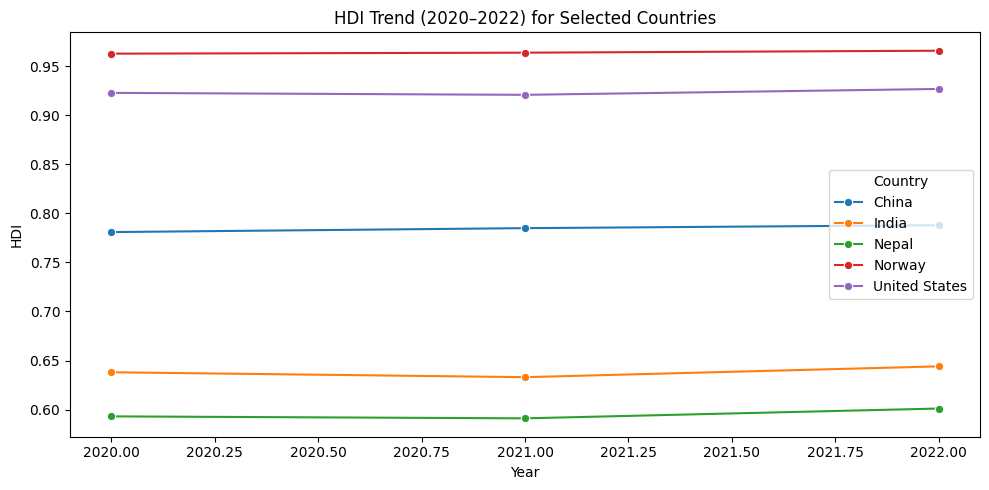

Caption: This line chart shows how HDI changed from 2020 to 2022 for five selected countries.


In [746]:
# select five countires HDI Trend and ploting it in line chart  diagram.
five_countries = ["Nepal", "India", "China", "United States", "Norway"]

line_df = hdi_2020_2022[hdi_2020_2022["country"].isin(five_countries)].copy()

plt.figure(figsize=(10, 5))
sns.lineplot(data=line_df, x="year", y="hdi", hue="country", marker="o")
plt.title("HDI Trend (2020–2022) for Selected Countries")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.legend(title="Country")
plt.tight_layout()
plt.show()

print("Caption: This line chart shows how HDI changed from 2020 to 2022 for five selected countries.")


In [747]:
hdi_2020_2022 = hdi_2020_2022.replace("—", np.nan)

# clean country text (fix spacing / casing)
if "country" in hdi_2020_2022.columns:
    hdi_2020_2022["country"] = (hdi_2020_2022["country"].astype(str).str.strip() )

In [748]:
essential_cols = ["hdi", "country", "year"]
print("Missing values in essential columns:")
print(hdi_2020_2022[essential_cols].isna().sum())

Missing values in essential columns:
hdi        0
country    0
year       0
dtype: int64


In [749]:
hdi_2020_2022 = hdi_2020_2022.dropna(subset=essential_cols)

In [750]:
hdi_2020_2022 = hdi_2020_2022.drop_duplicates(subset=["country", "year"])

In [751]:
region=['Arab States', 'East Asia and the Pacific', 'Europe and Central Asia', 'Latin America and the Caribbean', 'South Asia', 'Sub-Saharan Africa', 'World']

In [752]:
# extract region from df for years 2020-2022
region_df = df[df['year'].isin([2020, 2021, 2022]) & df['country'].isin(region)].copy()

# Calculate average HDI by region and year for plotting
region_avg = region_df.groupby(['country', 'year'])['hdi'].mean().reset_index()

In [753]:
region_df.head()

,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
6597,ZZE.AS,Arab States,2020,0.704,71.002055,444.139657,0.643550,0.736307,73.199459,69.008894,...,0.874,0.523,52.502355,58.498343,19.246456,80.753544,19.473349,69.888514,4.353388,9.497021
6598,ZZE.AS,Arab States,2021,0.704,70.895155,451.294821,0.645116,0.736276,73.079073,68.906560,...,0.876,0.523,52.415492,58.442164,18.333665,81.666335,19.931248,70.251402,4.580945,9.835023
6599,ZZE.AS,Arab States,2022,0.704,71.309417,459.318459,0.645935,0.736282,73.464010,69.332991,...,0.877,0.523,51.021837,57.430634,18.310139,81.689861,19.856689,70.173211,4.557463,9.986163
6630,ZZF.EAP,East Asia and the Pacific,2020,0.760,75.968641,2136.572381,0.744264,0.772505,78.874462,73.234611,...,0.963,0.338,72.590466,79.104372,20.976605,79.023395,53.600805,75.010062,5.988273,18.457468
6631,ZZF.EAP,East Asia and the Pacific,2021,0.761,75.579782,2143.560831,0.745709,0.773839,78.479478,72.863723,...,0.964,0.339,72.565863,79.075915,20.928102,79.071898,53.900785,75.174492,6.176975,19.031930


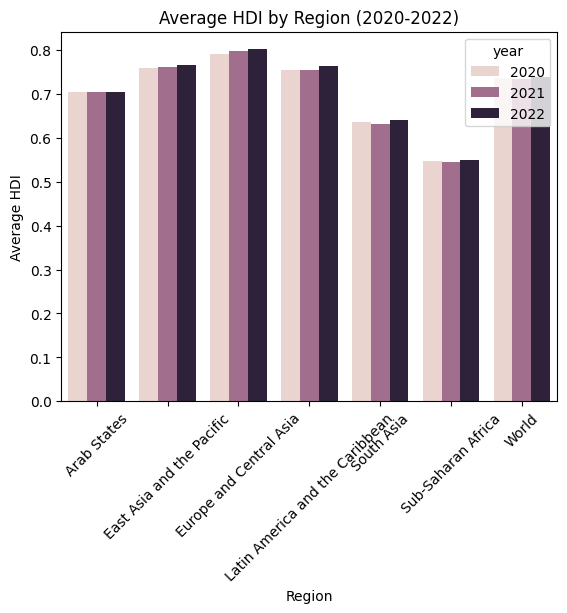

In [754]:
# ploting in bar chart of the given region
# Bar chart
plt.figure()
sns.barplot(data=region_avg, x='country', y='hdi', hue='year')
plt.title("Average HDI by Region (2020-2022)")
plt.xlabel("Region")
plt.ylabel("Average HDI")
plt.xticks(rotation=45)
plt.show()

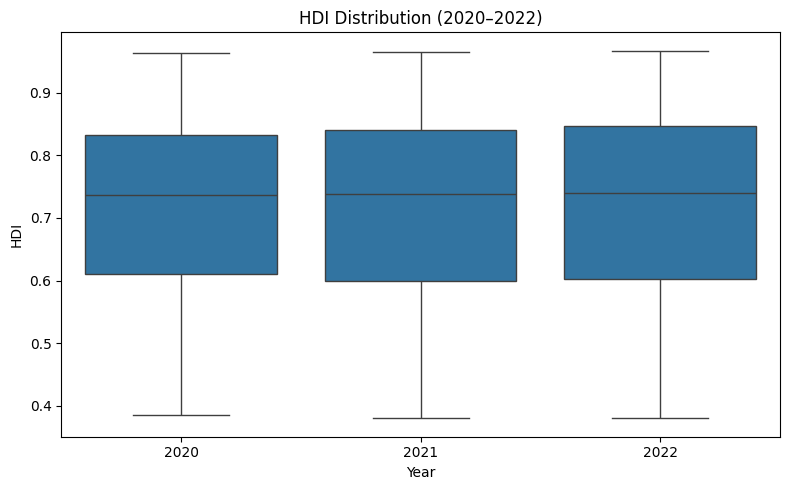

In [755]:
#ploting the HDI Distrubution of 2020, 2021,2022 dataset
plt.figure(figsize=(8, 5))
sns.boxplot(data=hdi_2020_2022, x="year", y="hdi")
plt.title("HDI Distribution (2020–2022)")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.tight_layout()
plt.show()


In [756]:
scatter_df = hdi_2020_2022.dropna(subset=["hdi", "gross_inc_percap"])

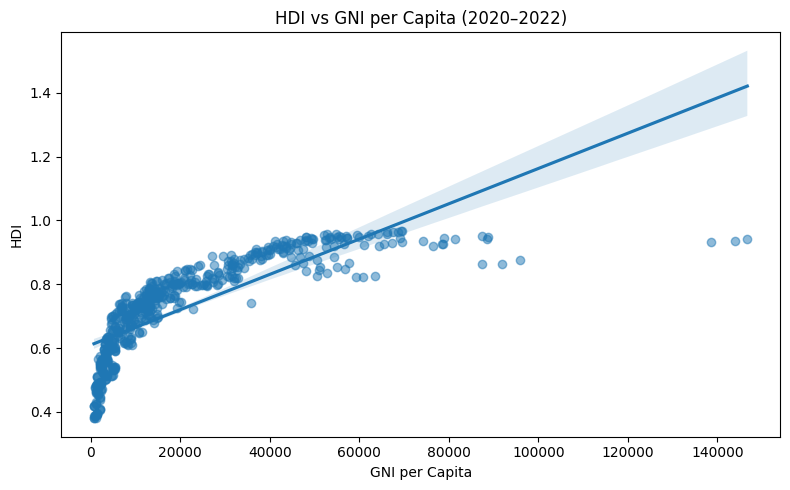

In [757]:
plt.figure(figsize=(8, 5))
sns.regplot(
data=scatter_df,x="gross_inc_percap",y="hdi",scatter_kws={"alpha": 0.5})
plt.title("HDI vs GNI per Capita (2020–2022)")
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.tight_layout()
plt.show()

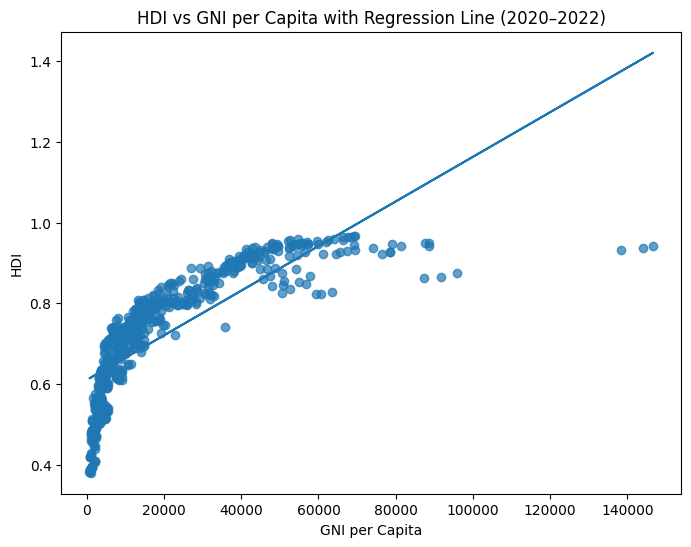

In [758]:
#REGRESSION PLOT
x = scatter_df["gross_inc_percap"]
y = scatter_df["hdi"]

m, b = np.polyfit(x, y, 1)

plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.7)
plt.plot(x, m*x + b)
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("HDI vs GNI per Capita with Regression Line (2020–2022)")
plt.show()

In [759]:
pivot = hdi_2020_2022.pivot_table(index="country", columns="year", values="hdi", aggfunc="mean")

# keep only countries that have both 2020 and 2022
pivot = pivot.dropna(subset=[2020, 2022])

pivot["hdi_change_2020_2022"] = pivot[2022] - pivot[2020]

top_improve = pivot.sort_values("hdi_change_2020_2022", ascending=False).head(10)
top_improve[["hdi_change_2020_2022"]]

year,hdi_change_2020_2022
country,
Andorra,0.041
Azerbaijan,0.038
Ecuador,0.031
Maldives,0.025
Mexico,0.024
Tajikistan,0.023
San Marino,0.023
Bahamas,0.022
Kuwait,0.021


In [760]:
decline = pivot[pivot["hdi_change_2020_2022"] < 0].sort_values("hdi_change_2020_2022").head(10)
decline[["hdi_change_2020_2022"]]

year,hdi_change_2020_2022
country,
Timor-Leste,-0.067
Ukraine,-0.028
Afghanistan,-0.026
Namibia,-0.024
Lebanon,-0.019
Saint Vincent and the Grenadines,-0.013
Suriname,-0.012
Eswatini,-0.012
Gabon,-0.011


In [761]:
region_avg_all = (
    region_df
    .groupby("country")["hdi"]
    .mean()
    .sort_values(ascending=False)
)

print("Highest average HDI region:", region_avg_all.index[0], "=", round(region_avg_all.iloc[0], 3))
print("Lowest average HDI region:", region_avg_all.index[-1], "=", round(region_avg_all.iloc[-1], 3))


Highest average HDI region: Europe and Central Asia = 0.797
Lowest average HDI region: Sub-Saharan Africa = 0.547


In [762]:
#  hdi dip during covid-19
hdi_2020_2022.groupby("year")["hdi"].mean()

,hdi
year,
2020,0.721927
2021,0.721036
2022,0.723741


<Axes: title={'center': 'Average Global HDI by Year'}, xlabel='year'>

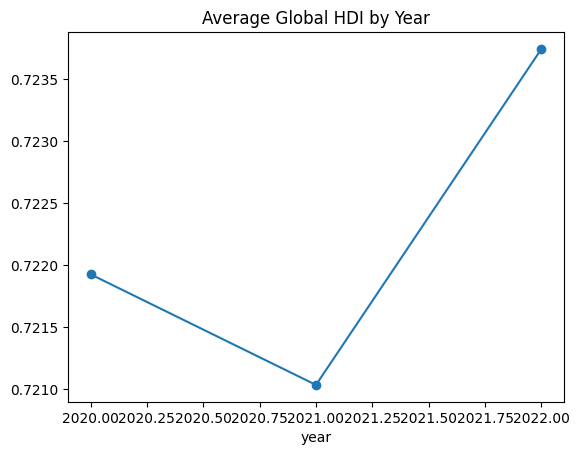

In [763]:
hdi_2020_2022.groupby("year")["hdi"].mean().plot(marker="o", title="Average Global HDI by Year")

**Possible reasons:**

COVID-19 impact (health system stress, deaths, reduced life expectancy)

School closures affecting education indicators

Economic slowdown / job losses reducing income component


COVID-19 likely affected HDI between 2020–2022 by:
1) reducing life expectancy in many countries,
2) disrupting education due to school closures,
3) lowering incomes through unemployment and reduced economic activity.
These effects may appear as slower HDI growth or temporary declines in some countries.



##Problem 2 — Advanced HDI Exploration (South Asia)

### South Asia Analysis (Completed)

In [764]:
# Task 1: Create South Asia Subset + Save CSV

south_asia_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                        "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

south_asia_df = df[df['country'].isin(south_asia_countries)].copy()

# (Optional but recommended) keep data clean for key numeric columns
for col in ['hdi', 'life expectancy', 'gross inc percap', 'gender development']:
    if col in south_asia_df.columns:
        south_asia_df[col] = pd.to_numeric(south_asia_df[col], errors='coerce')

# Save required CSV
south_asia_df.to_csv("HDI_SouthAsia.csv", index=False)
print("Saved: HDI SouthAsia.csv")

# Show quick preview
print("South Asia subset shape:", south_asia_df.shape)
south_asia_df.head()

Saved: HDI SouthAsia.csv
South Asia subset shape: (264, 29)


,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,43.709,...,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,44.353,...,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,45.070,...,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,50.216,...,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,49.531,...,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948


Composite Score is calculated using the provided formula.

In [765]:
# Task 2: Composite Development Score + Ranking + Top 5 Bar Chart
# Composite Score = 0.30 * life expectancy + 0.30 * gross inc percap
south_asia_df['Composite Score'] = 0.30 * south_asia_df['life_expectancy'] + 0.30 * south_asia_df['gross_inc_percap']

# Rank by Composite Score (higher is better)
comp_rank = south_asia_df[['country', 'hdi', 'Composite Score']].copy()
comp_rank['Composite Rank'] = comp_rank['Composite Score'].rank(ascending=False, method='dense')
comp_rank['HDI Rank'] = comp_rank['hdi'].rank(ascending=False, method='dense')
comp_rank_sorted = comp_rank.sort_values('Composite Rank')

print("\nComposite vs HDI Ranking (South Asia):")
display(comp_rank_sorted)



Composite vs HDI Ranking (South Asia):


,country,hdi,Composite Score,Composite Rank,HDI Rank
3530,Maldives,0.762,5678.289357,1.0,8.0
3527,Maldives,0.753,5628.012408,2.0,11.0
3526,Maldives,0.747,5440.721295,3.0,13.0
3525,Maldives,0.740,5266.375503,4.0,15.0
3524,Maldives,0.734,5097.397866,5.0,18.0
...,...,...,...,...,...
8,Afghanistan,0.329,384.070969,260.0,186.0
4,Afghanistan,0.300,376.051646,261.0,190.0
9,Afghanistan,0.337,353.150571,262.0,184.0
10,Afghanistan,0.340,330.792206,263.0,183.0


In [766]:
# Filter south_asia_df for the year 2022 to define sa_2022
sa_2022 = south_asia_df[south_asia_df['year'] == 2022].copy()

# rank by composite score
sa_composite_rank = sa_2022.sort_values("Composite Score", ascending=False)[
    ["country", "hdi", "Composite Score"]
].reset_index(drop=True)

sa_composite_rank

,country,hdi,Composite Score
0,Maldives,0.762,5678.289357
1,Sri Lanka,0.780,3592.832541
2,Bhutan,0.681,3209.130864
3,India,0.644,2105.481239
4,Bangladesh,0.670,1975.446053
5,Pakistan,0.540,1632.210427
6,Nepal,0.601,1228.811605
7,Afghanistan,0.462,419.425420


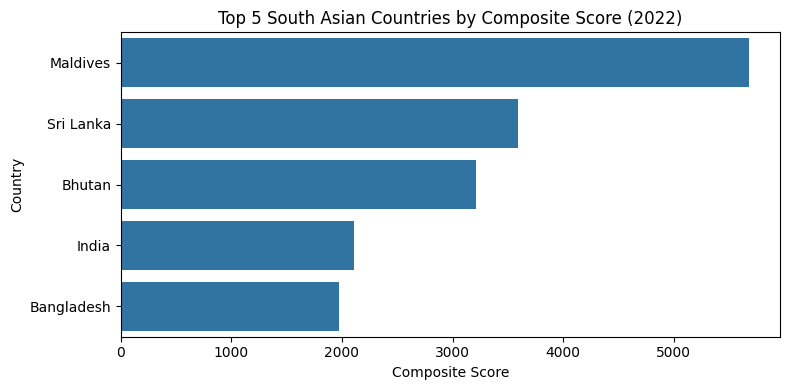

In [767]:

#Ranking the  top 5  SouthAsia countries in a horizontal bar chart.
top5 = sa_composite_rank.head(5)

plt.figure(figsize=(8, 4))
sns.barplot(data=top5, x="Composite Score", y="country")
plt.title("Top 5 South Asian Countries by Composite Score (2022)")
plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

In [768]:
 #Discussion output (required)
print("\nRanking differences (if any):")
diff = comp_rank_sorted[['country', 'Composite Rank', 'HDI Rank']].copy()
diff['Rank Difference (Composite - HDI)'] = diff['Composite Rank'] - diff['HDI Rank']
display(diff.sort_values('Rank Difference (Composite - HDI)', ascending=False))



Ranking differences (if any):


,country,Composite Rank,HDI Rank,Rank Difference (Composite - HDI)
32,Afghanistan,258.0,147.0,111.0
31,Afghanistan,250.0,141.0,109.0
30,Afghanistan,225.0,130.0,95.0
29,Afghanistan,214.0,126.0,88.0
4080,Nepal,181.0,96.0,85.0
...,...,...,...,...
631,Bhutan,171.0,NaN,NaN
630,Bhutan,178.0,NaN,NaN
629,Bhutan,187.0,NaN,NaN
627,Bhutan,188.0,NaN,NaN


In [769]:
# compare Composite ranking with HDI ranking

# Get HDI rank from the south_asia_df, aggregated by country
hdi_rank_series = (
    south_asia_df.groupby("country")["hdi"]
    .mean()
    .rank(ascending=False)
)

# Get Composite Score rank from sa_composite_rank, indexed by country
# sa_composite_rank already contains the 'country' column. Set it as index to align.
composite_rank_series = sa_composite_rank.set_index('country')['Composite Score'].rank(ascending=False)


comparison = pd.DataFrame({
    "Composite Rank": composite_rank_series,
    "HDI Rank": hdi_rank_series
}).sort_values("Composite Rank")

comparison

,Composite Rank,HDI Rank
country,,
Maldives,1.0,2.0
Sri Lanka,2.0,1.0
Bhutan,3.0,3.0
India,4.0,4.0
Bangladesh,5.0,5.0
Pakistan,6.0,7.0
Nepal,7.0,6.0
Afghanistan,8.0,8.0


In [770]:
# HDI ranking for the latest year (2022) using sa_2022
hdi_rank_latest = sa_2022.sort_values(
    by="hdi", ascending=False
)[["country", "hdi"]]

# Composite ranking using sa_composite_rank
composite_rank_scores = sa_composite_rank[["country", "Composite Score"]]

# Merge rankings for comparison
ranking_comparison = pd.merge(
    composite_rank_scores,
    hdi_rank_latest,
    on="country",
    suffixes=('_composite_score', '_hdi_value')
)

ranking_comparison

,country,Composite Score,hdi
0,Maldives,5678.289357,0.762
1,Sri Lanka,3592.832541,0.780
2,Bhutan,3209.130864,0.681
3,India,2105.481239,0.644
4,Bangladesh,1975.446053,0.670
5,Pakistan,1632.210427,0.540
6,Nepal,1228.811605,0.601
7,Afghanistan,419.425420,0.462


In [771]:
# Create South Asia dataframe (REQUIRED before outlier detection)

south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

sa_df = df[df["country"].isin(south_asia_countries)].copy()



In [772]:
# Filter South Asia data for the year 2022
sa_2022 = sa_df[sa_df["year"] == 2022].dropna(subset=["hdi", "gross_inc_percap"]).copy()

# Calculate IQR for HDI
Q1_hdi = sa_2022["hdi"].quantile(0.25)
Q3_hdi = sa_2022["hdi"].quantile(0.75)
IQR_hdi = Q3_hdi - Q1_hdi

# Calculate IQR for GNI per Capita
Q1_gni = sa_2022["gross_inc_percap"].quantile(0.25)
Q3_gni = sa_2022["gross_inc_percap"].quantile(0.75)
IQR_gni = Q3_gni - Q1_gni

# Identify outliers
sa_2022["Outlier"] = (
    (sa_2022["hdi"] < Q1_hdi - 1.5 * IQR_hdi) |
    (sa_2022["hdi"] > Q3_hdi + 1.5 * IQR_hdi) |
    (sa_2022["gross_inc_percap"] < Q1_gni - 1.5 * IQR_gni) |
    (sa_2022["gross_inc_percap"] > Q3_gni + 1.5 * IQR_gni)
)

# Display outlier results
sa_2022[["country", "hdi", "gross_inc_percap", "Outlier"]]


,country,hdi,gross_inc_percap,Outlier
32,Afghanistan,0.462,1335.205733,False
461,Bangladesh,0.670,6511.122178,False
659,Bhutan,0.681,10624.873880,False
2573,India,0.644,6950.526798,False
3530,Maldives,0.762,18846.792190,False
4091,Nepal,0.601,4025.554685,False
4388,Pakistan,0.540,5374.270423,False
5477,Sri Lanka,0.780,11899.498470,False


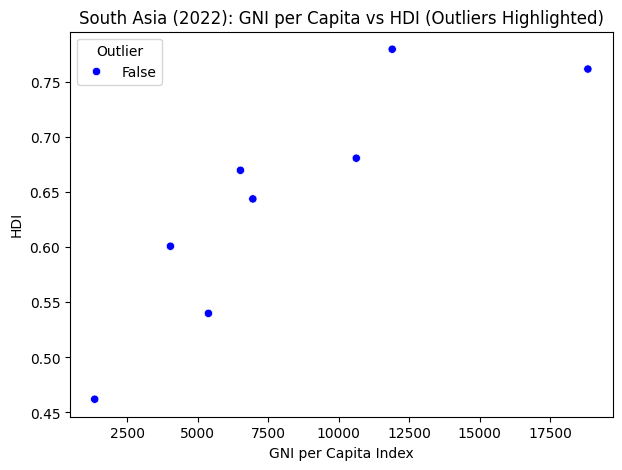

In [773]:
# Scatter plot with outliers highlighted
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=sa_2022,
    x="gross_inc_percap",
    y="hdi",
    hue="Outlier",
    palette={True: "red", False: "blue"}
)
plt.title("South Asia (2022): GNI per Capita vs HDI (Outliers Highlighted)")
plt.xlabel("GNI per Capita Index")
plt.ylabel("HDI")
plt.show()



#Why these countries are outliers
*   High-income outliers (e.g., Maldives) stand out due to significantly higher GNI per capita compared to other South Asian countries, driven by tourism-based economies.

*   Low-HDI outliers (e.g., Afghanistan) exhibit substantially lower HDI values, reflecting prolonged conflict, political instability, and limited access to health and education services.

*   These countries deviate strongly from the regional norm, causing them to fall outside the typical interquartile range.

*   The presence of such outliers highlights structural inequalities within South Asia and demonstrates why median-based or robust methods are often preferred when comparing development indicators.




Using the 1.5 × IQR rule, no countries in South Asia (2022) were identified as
statistical outliers in either HDI or GNI per Capita. This indicates that the
development indicators of South Asian countries fall within a relatively
consistent range without extreme deviations.


#Exploring Metric relationship

In [774]:


# Ensure required columns are numeric
cols = ["hdi", "gender_development", "life_expectancy"]

# Use the correctly named DataFrame 'south_asia_df'
south_asia_df[cols] = south_asia_df[cols].apply(
    pd.to_numeric, errors="coerce"
)

# Drop rows with missing values in selected columns
metric_df = south_asia_df[cols].dropna()


Rows with missing values are removed to ensure accurate correlation analysis

In [775]:
metrics = ["gender_development", "life_expectancy", "gross_inc_percap"]

In [776]:
# Pearson correlations
corr_gender = metric_df["hdi"].corr(metric_df["gender_development"])
corr_life = metric_df["hdi"].corr(metric_df["life_expectancy"])

print("Correlation (HDI vs Gender Development Index):", round(corr_gender, 3))
print("Correlation (HDI vs Life Expectancy Index):", round(corr_life, 3))


Correlation (HDI vs Gender Development Index): 0.866
Correlation (HDI vs Life Expectancy Index): 0.949


In [777]:
for m in metrics:
    temp = sa_2022.dropna(subset=["hdi", m])
    corr = temp["hdi"].corr(temp[m], method="pearson")
    print(f"Pearson correlation (HDI vs {m}): {corr:.4f}")


Pearson correlation (HDI vs gender_development): 0.8848
Pearson correlation (HDI vs life_expectancy): 0.9282
Pearson correlation (HDI vs gross_inc_percap): 0.8597


In [778]:

# Ensure numeric values
south_asia_df["hdi"] = pd.to_numeric(south_asia_df["hdi"], errors="coerce")
south_asia_df["gross_inc_percap"] = pd.to_numeric(
    south_asia_df["gross_inc_percap"], errors="coerce"
)

# Drop missing values
gni_df = south_asia_df[["hdi", "gross_inc_percap"]].dropna()


In [779]:
corr_gni = gni_df["hdi"].corr(gni_df["gross_inc_percap"])
print("Correlation (HDI vs GNI per Capita):", round(corr_gni, 3))


Correlation (HDI vs GNI per Capita): 0.801


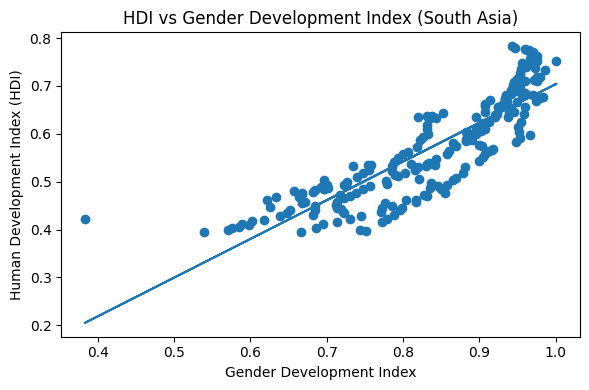

In [780]:
import matplotlib.pyplot as plt

# Scatter plot with trendline: Gender Development Index
plt.figure(figsize=(6, 4))
plt.scatter(
    metric_df["gender_development"],
    metric_df["hdi"]
)

# Trendline
z = np.polyfit(metric_df["gender_development"], metric_df["hdi"], 1)
p = np.poly1d(z)
plt.plot(
    metric_df["gender_development"],
    p(metric_df["gender_development"])
)

plt.xlabel("Gender Development Index")
plt.ylabel("Human Development Index (HDI)")
plt.title("HDI vs Gender Development Index (South Asia)")
plt.tight_layout()
plt.show()


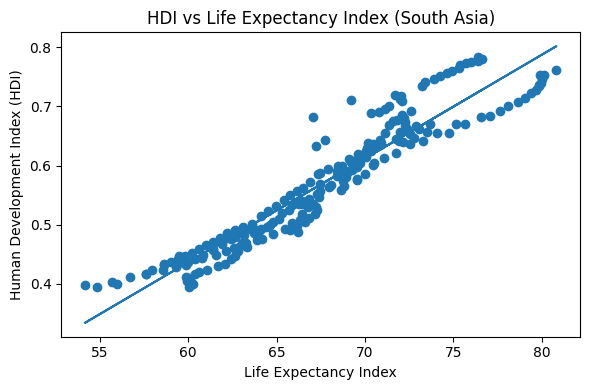

In [781]:
# Scatter plot with trendline: Life Expectancy Index
plt.figure(figsize=(6, 4))
plt.scatter(
    metric_df["life_expectancy"],
    metric_df["hdi"]
)

# Trendline
z = np.polyfit(metric_df["life_expectancy"], metric_df["hdi"], 1)
p = np.poly1d(z)
plt.plot(
    metric_df["life_expectancy"],
    p(metric_df["life_expectancy"])
)

plt.xlabel("Life Expectancy Index")
plt.ylabel("Human Development Index (HDI)")
plt.title("HDI vs Life Expectancy Index (South Asia)")
plt.tight_layout()
plt.show()


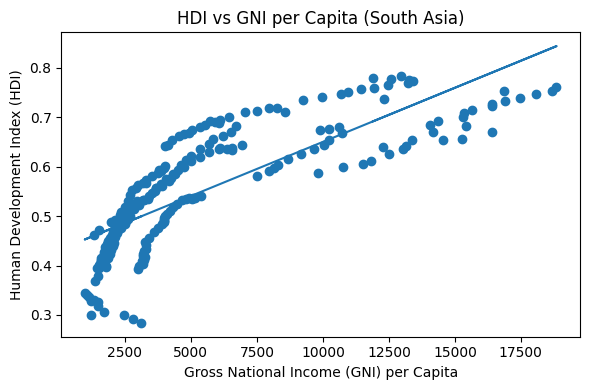

In [782]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

# Scatter plot
plt.scatter(
    gni_df["gross_inc_percap"],
    gni_df["hdi"]
)

# Trendline
z = np.polyfit(gni_df["gross_inc_percap"], gni_df["hdi"], 1)
p = np.poly1d(z)
plt.plot(
    gni_df["gross_inc_percap"],
    p(gni_df["gross_inc_percap"])
)

plt.xlabel("Gross National Income (GNI) per Capita")
plt.ylabel("Human Development Index (HDI)")
plt.title("HDI vs GNI per Capita (South Asia)")
plt.tight_layout()
plt.show()


In [783]:
corrs = {}
for m in metrics:
    temp = sa_2022.dropna(subset=["hdi", m])
    corrs[m] = temp["hdi"].corr(temp[m], method="pearson")

strongest = max(corrs, key=lambda k: abs(corrs[k]))
weakest = min(corrs, key=lambda k: abs(corrs[k]))

print("Strongest relationship with HDI:", strongest, "=", corrs[strongest])
print("Weakest relationship with HDI:", weakest, "=", corrs[weakest])


Strongest relationship with HDI: life_expectancy = 0.9281974040239386
Weakest relationship with HDI: gross_inc_percap = 0.8597393737036576


**Metric Relationship Interpretation:**  
The Life Expectancy Index shows a stronger positive correlation with HDI compared to the Gender Development Index.  
This indicates that health outcomes have a greater influence on human development in South Asia, while gender development, although positively related, shows a weaker association with HDI.


#Gap Analysis:

In [784]:


# Ensure required columns are numeric
south_asia_df["gross_inc_percap"] = pd.to_numeric(
    south_asia_df["gross_inc_percap"], errors="coerce"
)
south_asia_df["hdi"] = pd.to_numeric(
    south_asia_df["hdi"], errors="coerce"
)

# Create GNI–HDI Gap
south_asia_df["GNI_HDI_Gap"] = (
    south_asia_df["gross_inc_percap"] - south_asia_df["hdi"]
)

south_asia_df[["country", "gross_inc_percap", "hdi", "GNI_HDI_Gap"]]

,country,gross_inc_percap,hdi,GNI_HDI_Gap
0,Afghanistan,3115.670448,0.284,3115.386448
1,Afghanistan,2817.304736,0.292,2817.012736
2,Afghanistan,2474.681985,0.299,2474.382985
3,Afghanistan,1723.019763,0.307,1722.712763
4,Afghanistan,1202.010488,0.300,1201.710488
...,...,...,...,...
5473,Sri Lanka,13405.803690,0.774,13405.029690
5474,Sri Lanka,13262.958220,0.775,13262.183220
5475,Sri Lanka,12589.806450,0.777,12589.029450
5476,Sri Lanka,12958.822260,0.783,12958.039260


This metric highlights the difference between income level and human development, helping identify countries where income does not translate proportionally into HDI.

In [785]:
sa_gap = sa_2022.dropna(subset=["gross_inc_percap", "hdi"]).copy()
sa_gap["GNI_HDI_Gap"] = sa_gap["gross_inc_percap"] - sa_gap["hdi"]

# ranks
desc_rank = sa_gap.sort_values("GNI_HDI_Gap", ascending=False)[["country", "GNI_HDI_Gap"]]
asc_rank = sa_gap.sort_values("GNI_HDI_Gap", ascending=True)[["country", "GNI_HDI_Gap"]]

print("Top positive gaps:")
print(desc_rank.head(3))

print("\nTop negative gaps:")
print(asc_rank.head(3))


Top positive gaps:
        country  GNI_HDI_Gap
3530   Maldives  18846.03019
5477  Sri Lanka  11898.71847
659      Bhutan  10624.19288

Top negative gaps:
          country  GNI_HDI_Gap
32    Afghanistan  1334.743733
4091        Nepal  4024.953685
4388     Pakistan  5373.730423


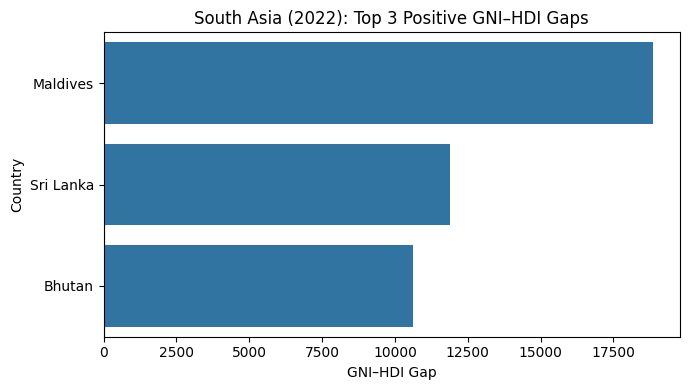

In [786]:
# Ranks are already calculated in a previous cell.
# Use the 'sa_gap' DataFrame and re-calculate top_pos and top_neg if not already in memory.

# Rank by GNI–HDI Gap using the correct DataFrame 'sa_gap'
desc_rank = sa_gap.sort_values("GNI_HDI_Gap", ascending=False)

# Separate top positive and negative gaps
top_pos = desc_rank.head(3)

plt.figure(figsize=(7, 4))
sns.barplot(
    data=top_pos,
    x="GNI_HDI_Gap",
    y="country"
)

plt.axvline(0)
plt.title("South Asia (2022): Top 3 Positive GNI–HDI Gaps")
plt.xlabel("GNI–HDI Gap")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

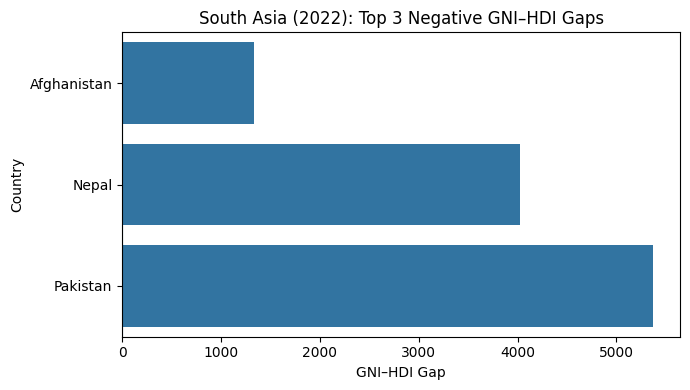

In [787]:
# Ranks are already calculated in a previous cell.
# Use the 'sa_gap' DataFrame and re-calculate top_neg if not already in memory.

# Rank by GNI–HDI Gap using the correct DataFrame 'sa_gap'
asc_rank = sa_gap.sort_values("GNI_HDI_Gap", ascending=True)

# Separate top negative gaps
top_neg = asc_rank.head(3)

plt.figure(figsize=(7, 4))
sns.barplot(
    data=top_neg,
    x="GNI_HDI_Gap",
    y="country"
)

plt.axvline(0)
plt.title("South Asia (2022): Top 3 Negative GNI–HDI Gaps")
plt.xlabel("GNI–HDI Gap")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

High positive gap: income looks high but HDI not equally high → may indicate weaker education/health outcomes.

Negative gap: HDI relatively good despite lower income → strong health/education policies.

The GNI–HDI gap shows how effectively income is converted into human development. Countries with high positive gaps have relatively high income but lower HDI, indicating that economic growth is not translating efficiently into health and education outcomes. In contrast, negative gaps suggest countries achieve better human development despite lower income, often due to effective social policies. This highlights that income alone is insufficient to ensure high human development.

##Problem 3 — South Asia vs Middle East (2020–2022)

### South Asia vs Middle East Comparison (Completed)

In [788]:
# Load df_b from HDI problem1B.csv and preprocess it
df_b = pd.read_csv("HDI problem1B.csv")
df_b = df_b.replace("-", np.nan) # Corrected en-dash to hyphen

# ensure types
df_b["year"] = pd.to_numeric(df_b["year"], errors="coerce")
df_b["hdi"] = pd.to_numeric(df_b["hdi"], errors="coerce")

if "country" in df_b.columns:
    df_b["country"] = df_b["country"].astype(str).str.strip()

# convert other numeric columns if present
for col in ["gender_development", "life_expectancy", "gross_inc_percap"]:
    if col in df_b.columns:
        df_b[col] = pd.to_numeric(df_b[col], errors="coerce")

# Define regions
south_asia = ["Afghanistan", "Bangladesh", "Bhutan", "India",
              "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
middle_east = ["Bahrain","Iran","Iraq","Israel","Jordan","Kuwait","Lebanon","Oman",
               "Palestine","Qatar","Saudi Arabia","Syria","United Arab Emirates","Yemen"]

# Filter data for each region
sa_1b = df_b[df_b["country"].isin(south_asia)]
me_1b = df_b[df_b["country"].isin(middle_east)]

# Save to CSV files
sa_1b.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
me_1b.to_csv("HDI_MiddleEast_2020_2022.csv", index=False) # Corrected typo in filename

In [789]:
print("South Asia rows:", sa_1b.shape[0])
print("Countries:", sa_1b["country"].unique())

South Asia rows: 24
Countries: ['Afghanistan' 'Bangladesh' 'Bhutan' 'India' 'Maldives' 'Nepal' 'Pakistan'
 'Sri Lanka']


In [790]:
print("Middle East rows:", me_1b.shape[0])
print("Countries:", me_1b["country"].unique())

Middle East rows: 33
Countries: ['Bahrain' 'Iraq' 'Israel' 'Jordan' 'Kuwait' 'Lebanon' 'Oman' 'Qatar'
 'Saudi Arabia' 'United Arab Emirates' 'Yemen']


Coefficient of variation is used to compare relative HDI variability.

In [791]:
import pandas as pd

south_asia_df = pd.read_csv("HDI_SouthAsia_2020_2022.csv")
middle_east_df = pd.read_csv("HDI_MiddleEast_2020_2022.csv")


In [792]:
# South Asia statistics
sa_mean = south_asia_df["hdi"].mean()
sa_std = south_asia_df["hdi"].std()

# Middle East statistics
me_mean = middle_east_df["hdi"].mean()
me_std = middle_east_df["hdi"].std()

print("South Asia – Mean HDI:", round(sa_mean, 3))
print("South Asia – Std HDI:", round(sa_std, 3))

print("Middle East – Mean HDI:", round(me_mean, 3))
print("Middle East – Std HDI:", round(me_std, 3))



South Asia – Mean HDI: 0.64
South Asia – Std HDI: 0.098
Middle East – Mean HDI: 0.789
Middle East – Std HDI: 0.141


In [793]:
if me_mean > sa_mean:
    better_region = "Middle East"
else:
    better_region = "South Asia"

print("Region with higher average HDI (2020–2022):", better_region)


Region with higher average HDI (2020–2022): Middle East


Top and Bottom Performers (2020–2022)

In [794]:
#load

south_asia_df = pd.read_csv("HDI_SouthAsia_2020_2022.csv")
middle_east_df = pd.read_csv("HDI_MiddleEast_2020_2022.csv")


In [795]:
# Average HDI by country
sa_avg = south_asia_df.groupby("country", as_index=False)["hdi"].mean()
me_avg = middle_east_df.groupby("country", as_index=False)["hdi"].mean()


In [796]:
# South Asia
sa_top3 = sa_avg.sort_values("hdi", ascending=False).head(3)
sa_bottom3 = sa_avg.sort_values("hdi", ascending=True).head(3)

# Middle East
me_top3 = me_avg.sort_values("hdi", ascending=False).head(3)
me_bottom3 = me_avg.sort_values("hdi", ascending=True).head(3)

# Add region labels
sa_top3["region"] = "South Asia"
sa_bottom3["region"] = "South Asia"
me_top3["region"] = "Middle East"
me_bottom3["region"] = "Middle East"


In [797]:
sa_top3 = sa_avg.head(3)
sa_bottom3 = sa_avg.tail(3)

me_top3 = me_avg.head(3)
me_bottom3 = me_avg.tail(3)

print("South Asia Top 3:\n", sa_top3)
print("\nSouth Asia Bottom 3:\n", sa_bottom3)

print("\nMiddle East Top 3:\n", me_top3)
print("\nMiddle East Bottom 3:\n", me_bottom3)


South Asia Top 3:
        country       hdi
0  Afghanistan  0.474333
1   Bangladesh  0.663000
2       Bhutan  0.677667

South Asia Bottom 3:
      country       hdi
5      Nepal  0.595000
6   Pakistan  0.537667
7  Sri Lanka  0.780000

Middle East Top 3:
    country       hdi
0  Bahrain  0.885333
1     Iraq  0.667000
2   Israel  0.910667

Middle East Bottom 3:
                  country       hdi
8           Saudi Arabia  0.867667
9   United Arab Emirates  0.932667
10                 Yemen  0.426333


In [798]:
compare_df = pd.concat([
    sa_top3.rename(columns={'hdi': 'avg_hdi'}).assign(group="Top 3", region="South Asia"),
    sa_bottom3.rename(columns={'hdi': 'avg_hdi'}).assign(group="Bottom 3", region="South Asia"),
    me_top3.rename(columns={'hdi': 'avg_hdi'}).assign(group="Top 3", region="Middle East"),
    me_bottom3.rename(columns={'hdi': 'avg_hdi'}).assign(group="Bottom 3", region="Middle East")
])
print(compare_df)

                 country   avg_hdi     group       region
0            Afghanistan  0.474333     Top 3   South Asia
1             Bangladesh  0.663000     Top 3   South Asia
2                 Bhutan  0.677667     Top 3   South Asia
5                  Nepal  0.595000  Bottom 3   South Asia
6               Pakistan  0.537667  Bottom 3   South Asia
7              Sri Lanka  0.780000  Bottom 3   South Asia
0                Bahrain  0.885333     Top 3  Middle East
1                   Iraq  0.667000     Top 3  Middle East
2                 Israel  0.910667     Top 3  Middle East
8           Saudi Arabia  0.867667  Bottom 3  Middle East
9   United Arab Emirates  0.932667  Bottom 3  Middle East
10                 Yemen  0.426333  Bottom 3  Middle East


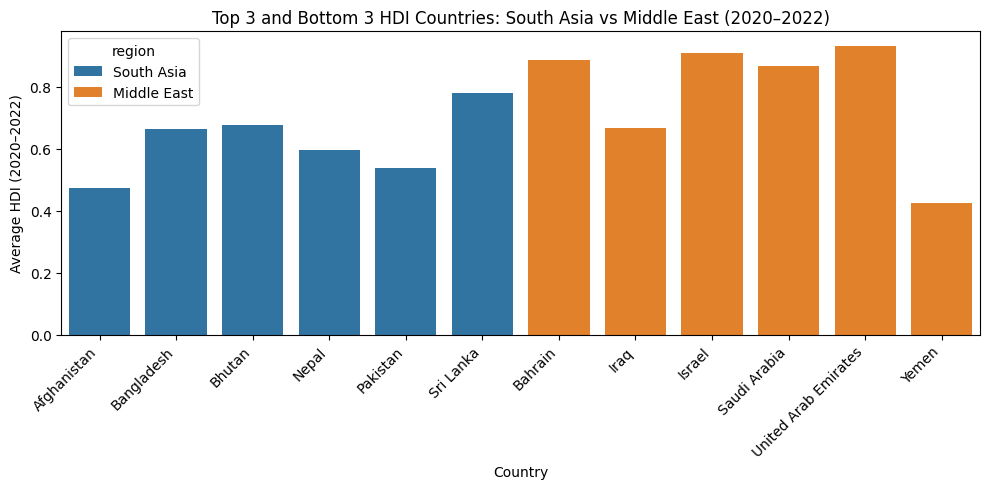

In [799]:
plt.figure(figsize=(10, 5))
sns.barplot(data=compare_df,x="country",y="avg_hdi",hue="region")

plt.title("Top 3 and Bottom 3 HDI Countries: South Asia vs Middle East (2020–2022)")
plt.xlabel("Country")
plt.ylabel("Average HDI (2020–2022)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Comparison of Top and Bottom HDI Performers in South Asia and the Middle East (2020–2022)
This bar chart compares the average HDI of the top three and bottom three countries in South Asia and the Middle East, highlighting significant differences in human development performance between and within regions.

In [800]:
# Compute mean values (2020–2022)
sa_metrics = south_asia_df[[
    "gender_development", "life_expectancy", "gross_inc_percap"
]].mean()

me_metrics = middle_east_df[[
    "gender_development", "life_expectancy", "gross_inc_percap"
]].mean()

# Create comparison dataframe
metric_compare_df = pd.DataFrame({
    "Metric": ["Gender Development Index", "Life Expectancy Index", "GNI per Capita Index"],
    "South Asia": sa_metrics.values,
    "Middle East": me_metrics.values
})

metric_compare_df


,Metric,South Asia,Middle East
0,Gender Development Index,0.881458,0.896545
1,Life Expectancy Index,70.970083,75.855455
2,GNI per Capita Index,7766.509931,37750.770520


In [801]:
summary = []

for m in metrics:
    summary.append(["South Asia", m, south_asia_df[m].mean()])
    summary.append(["Middle East", m, middle_east_df[m].mean()])

summary_df = pd.DataFrame(summary, columns=["region", "metric", "mean_value"])
summary_df

,region,metric,mean_value
0,South Asia,gender_development,0.881458
1,Middle East,gender_development,0.896545
2,South Asia,life_expectancy,70.970083
3,Middle East,life_expectancy,75.855455
4,South Asia,gross_inc_percap,7766.509931
5,Middle East,gross_inc_percap,37750.770520


In [802]:
plot_df = metric_compare_df.melt(
    id_vars="Metric",
    var_name="Region",
    value_name="Average Value"
)


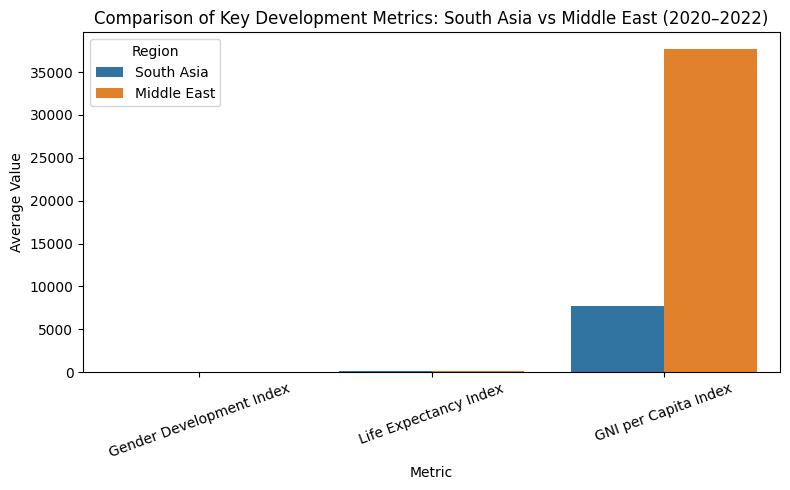

In [803]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=plot_df,
    x="Metric",
    y="Average Value",
    hue="Region"
)

plt.title("Comparison of Key Development Metrics: South Asia vs Middle East (2020–2022)")
plt.xlabel("Metric")
plt.ylabel("Average Value")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


This grouped bar chart compares average development indicators across the two regions, highlighting differences in social and economic outcomes.

In [804]:
# Calculate absolute differences
metric_compare_df["Absolute_Difference"] = (
    metric_compare_df["Middle East"] - metric_compare_df["South Asia"]
).abs()

metric_compare_df


,Metric,South Asia,Middle East,Absolute_Difference
0,Gender Development Index,0.881458,0.896545,0.015087
1,Life Expectancy Index,70.970083,75.855455,4.885371
2,GNI per Capita Index,7766.509931,37750.770520,29984.260588


In [805]:
# Metric with greatest disparity
metric_compare_df.loc[
    metric_compare_df["Absolute_Difference"].idxmax(), "Metric"
]


'GNI per Capita Index'

In [806]:
# South Asia range
sa_range = south_asia_df["hdi"].max() - south_asia_df["hdi"].min()

# Middle East range
me_range = middle_east_df["hdi"].max() - middle_east_df["hdi"].min()

print("South Asia HDI Range:", round(sa_range, 3))
print("Middle East HDI Range:", round(me_range, 3))


South Asia HDI Range: 0.321
Middle East HDI Range: 0.513


In [807]:
# South Asia CV
sa_mean = south_asia_df["hdi"].mean()
sa_std = south_asia_df["hdi"].std()
sa_cv = sa_std / sa_mean

# Middle East CV
me_mean = middle_east_df["hdi"].mean()
me_std = middle_east_df["hdi"].std()
me_cv = me_std / me_mean

print("South Asia HDI CV:", round(sa_cv, 3))
print("Middle East HDI CV:", round(me_cv, 3))


South Asia HDI CV: 0.154
Middle East HDI CV: 0.179


In [808]:
if sa_cv > me_cv:
    more_variation = "South Asia"
else:
    more_variation = "Middle East"

print("Region with greater HDI variation:", more_variation)


Region with greater HDI variation: Middle East


In [809]:
def hdi_stats(region_df):
    mean = region_df["hdi"].mean()
    std = region_df["hdi"].std()
    hdi_range = region_df["hdi"].max() - region_df["hdi"].min()
    cv = std / mean if mean != 0 else np.nan
    return mean, std, hdi_range, cv

sa_stats = hdi_stats(south_asia_df)
me_stats = hdi_stats(middle_east_df)

print("South Asia (mean, std, range, CV):", sa_stats)
print("Middle East (mean, std, range, CV):", me_stats)

more_var = "Middle East" if me_stats[3] > sa_stats[3] else "South Asia"
print("Region with more variation (by CV):", more_var)

South Asia (mean, std, range, CV): (np.float64(0.6395833333333333), 0.09827331747496995, 0.321, np.float64(0.1536520924690084))
Middle East (mean, std, range, CV): (np.float64(0.7889090909090909), 0.14129476362297624, 0.5130000000000001, np.float64(0.17910145193048382))
Region with more variation (by CV): Middle East


In [810]:
# Ensure numeric columns
cols = ["hdi", "gender_development", "life_expectancy"]

south_asia_df[cols] = south_asia_df[cols].apply(pd.to_numeric, errors="coerce")
middle_east_df[cols] = middle_east_df[cols].apply(pd.to_numeric, errors="coerce")

In [811]:
# South Asia correlations
sa_corr_gender = south_asia_df["hdi"].corr(south_asia_df["gender_development"])
sa_corr_life = south_asia_df["hdi"].corr(south_asia_df["life_expectancy"])

# Middle East correlations
me_corr_gender = middle_east_df["hdi"].corr(middle_east_df["gender_development"])
me_corr_life = middle_east_df["hdi"].corr(middle_east_df["life_expectancy"])

print("South Asia – HDI vs Gender Development:", round(sa_corr_gender, 3))
print("South Asia – HDI vs Life Expectancy:", round(sa_corr_life, 3))

print("Middle East – HDI vs Gender Development:", round(me_corr_gender, 3))
print("Middle East – HDI vs Life Expectancy:", round(me_corr_life, 3))


South Asia – HDI vs Gender Development: 0.874
South Asia – HDI vs Life Expectancy: 0.939
Middle East – HDI vs Gender Development: 0.936
Middle East – HDI vs Life Expectancy: 0.933


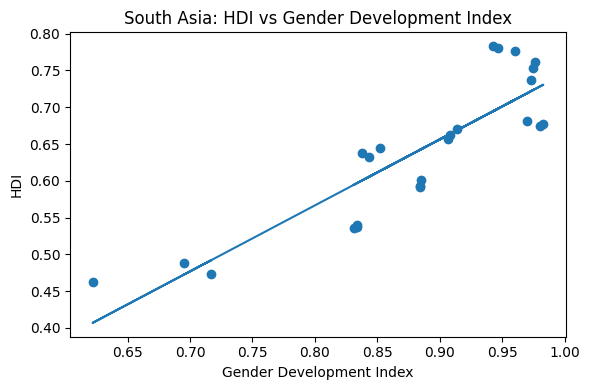

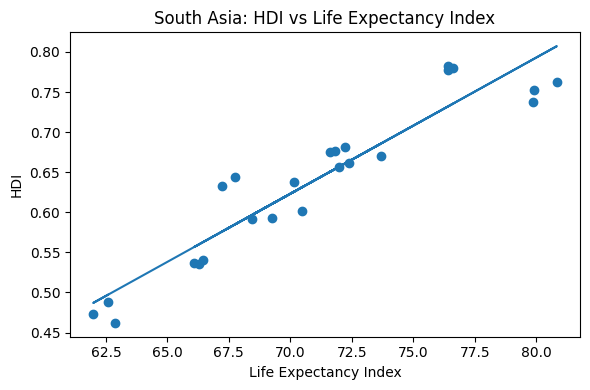

In [812]:
# HDI vs Gender Development (South Asia)
plt.figure(figsize=(6, 4))
plt.scatter(south_asia_df["gender_development"], south_asia_df["hdi"])
z = np.polyfit(south_asia_df["gender_development"].dropna(),
               south_asia_df["hdi"].dropna(), 1)
p = np.poly1d(z)
plt.plot(south_asia_df["gender_development"], p(south_asia_df["gender_development"]))
plt.xlabel("Gender Development Index")
plt.ylabel("HDI")
plt.title("South Asia: HDI vs Gender Development Index")
plt.tight_layout()
plt.show()


# HDI vs Life Expectancy (South Asia)
plt.figure(figsize=(6, 4))
plt.scatter(south_asia_df["life_expectancy"], south_asia_df["hdi"])
z = np.polyfit(south_asia_df["life_expectancy"].dropna(),
               south_asia_df["hdi"].dropna(), 1)
p = np.poly1d(z)
plt.plot(south_asia_df["life_expectancy"], p(south_asia_df["life_expectancy"]))
plt.xlabel("Life Expectancy Index")
plt.ylabel("HDI")
plt.title("South Asia: HDI vs Life Expectancy Index")
plt.tight_layout()
plt.show()


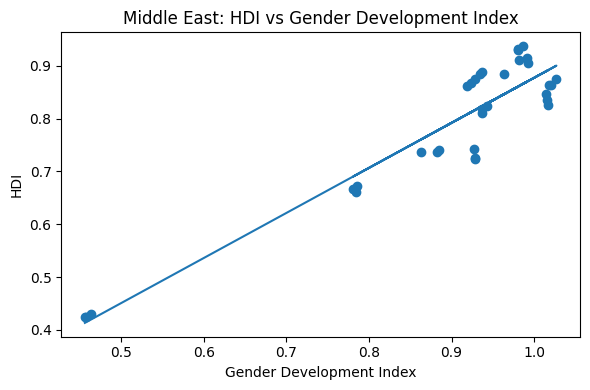

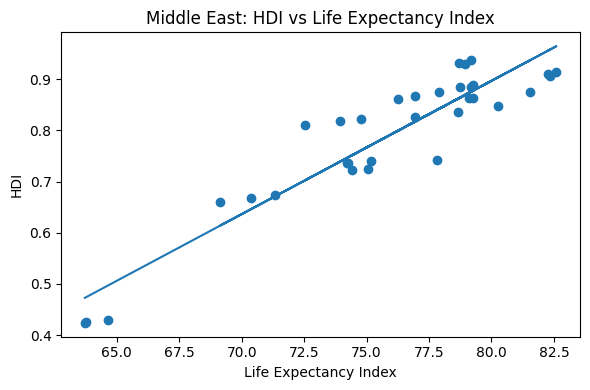

In [813]:
# HDI vs Gender Development (Middle East)
plt.figure(figsize=(6, 4))
plt.scatter(middle_east_df["gender_development"], middle_east_df["hdi"])
z = np.polyfit(middle_east_df["gender_development"].dropna(),
               middle_east_df["hdi"].dropna(), 1)
p = np.poly1d(z)
plt.plot(middle_east_df["gender_development"], p(middle_east_df["gender_development"]))
plt.xlabel("Gender Development Index")
plt.ylabel("HDI")
plt.title("Middle East: HDI vs Gender Development Index")
plt.tight_layout()
plt.show()


# HDI vs Life Expectancy (Middle East)
plt.figure(figsize=(6, 4))
plt.scatter(middle_east_df["life_expectancy"], middle_east_df["hdi"])
z = np.polyfit(middle_east_df["life_expectancy"].dropna(),
               middle_east_df["hdi"].dropna(), 1)
p = np.poly1d(z)
plt.plot(middle_east_df["life_expectancy"], p(middle_east_df["life_expectancy"]))
plt.xlabel("Life Expectancy Index")
plt.ylabel("HDI")
plt.title("Middle East: HDI vs Life Expectancy Index")
plt.tight_layout()
plt.show()


In both regions, HDI is positively correlated with the Gender Development Index and the Life Expectancy Index. The Life Expectancy Index shows the strongest relationship with HDI, highlighting the importance of health outcomes in driving human development. The Gender Development Index demonstrates a moderate positive relationship, indicating that gender equality contributes to HDI but to a lesser extent than health. Overall, these relationships are stronger in the Middle East, suggesting more consistent links between social indicators and development outcomes.

In [814]:
# Ensure numeric
for df in [south_asia_df, middle_east_df]:
    df["hdi"] = pd.to_numeric(df["hdi"], errors="coerce")
    df["gross_inc_percap"] = pd.to_numeric(df["gross_inc_percap"], errors="coerce")

In [815]:
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)



In [816]:
#South Asia Outliers
south_asia_df["HDI_Outlier"] = detect_outliers_iqr(south_asia_df["hdi"])
south_asia_df["GNI_Outlier"] = detect_outliers_iqr(south_asia_df["gross_inc_percap"])
south_asia_df["Outlier"] = south_asia_df["HDI_Outlier"] | south_asia_df["GNI_Outlier"]

south_asia_df[south_asia_df["Outlier"]][
    ["country", "hdi", "gross_inc_percap"]
]


,country,hdi,gross_inc_percap


In [817]:
#Middle East Outliers
middle_east_df["HDI_Outlier"] = detect_outliers_iqr(middle_east_df["hdi"])
middle_east_df["GNI_Outlier"] = detect_outliers_iqr(middle_east_df["gross_inc_percap"])
middle_east_df["Outlier"] = middle_east_df["HDI_Outlier"] | middle_east_df["GNI_Outlier"]

middle_east_df[middle_east_df["Outlier"]][
    ["country", "hdi", "gross_inc_percap"]
]


,country,hdi,gross_inc_percap
30,Yemen,0.430,1152.015672
31,Yemen,0.425,1112.162989
32,Yemen,0.424,1105.763435


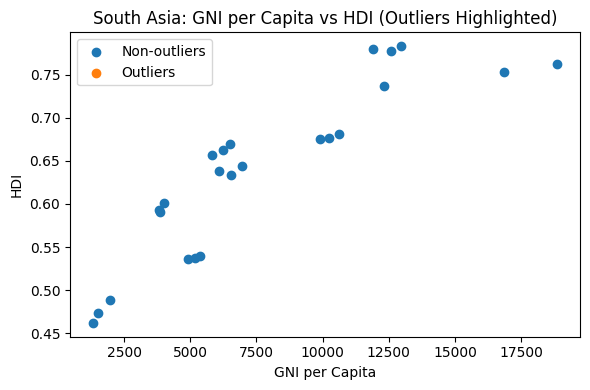

In [818]:
#South Asia: GNI per Capita vs HDI
plt.figure(figsize=(6, 4))

plt.scatter(
    south_asia_df.loc[~south_asia_df["Outlier"], "gross_inc_percap"],
    south_asia_df.loc[~south_asia_df["Outlier"], "hdi"],
    label="Non-outliers"
)

plt.scatter(
    south_asia_df.loc[south_asia_df["Outlier"], "gross_inc_percap"],
    south_asia_df.loc[south_asia_df["Outlier"], "hdi"],
    label="Outliers"
)

plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("South Asia: GNI per Capita vs HDI (Outliers Highlighted)")
plt.legend()
plt.tight_layout()
plt.show()


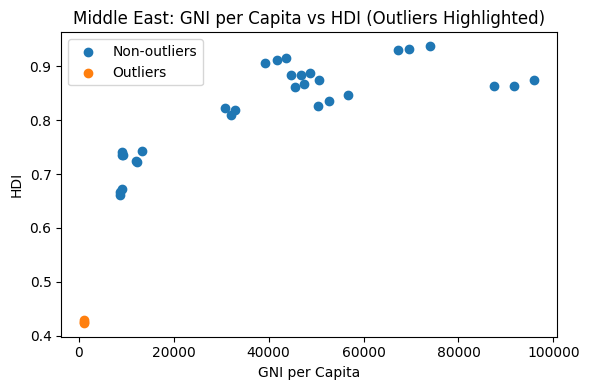

In [819]:
#Middle East: GNI per Capita vs HDI
plt.figure(figsize=(6, 4))

plt.scatter(
    middle_east_df.loc[~middle_east_df["Outlier"], "gross_inc_percap"],
    middle_east_df.loc[~middle_east_df["Outlier"], "hdi"],
    label="Non-outliers"
)

plt.scatter(
    middle_east_df.loc[middle_east_df["Outlier"], "gross_inc_percap"],
    middle_east_df.loc[middle_east_df["Outlier"], "hdi"],
    label="Outliers"
)

plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("Middle East: GNI per Capita vs HDI (Outliers Highlighted)")
plt.legend()
plt.tight_layout()
plt.show()



Outliers in GNI per capita reflect countries with unusually high or low income levels due to factors such as natural resources, conflict, or economic structure. HDI outliers indicate development outcomes that differ significantly from regional norms, highlighting disparities in health, education, and social stability. In South Asia, these outliers reveal strong contrasts between low- and higher-performing countries, while in the Middle East they show that high income does not always translate into equally high human development. Overall, the presence of outliers underscores structural inequalities and the need to interpret regional averages cautiously.
